<a href="https://colab.research.google.com/github/kvijay0611/CNN_Pytorch_Learn/blob/main/03Pytorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
from torchvision.transforms import ToPILImage
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt
print(torch.__version__)
print(torchvision.__version__ )

2.5.1+cu121
0.20.1+cu121


In [ ]:
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root = "data",
    train = True ,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform= None
)
test_data = datasets.FashionMNIST(
    root = "data",
    train = False ,
    download = True,
    transform= ToTensor(),
    target_transform= None
)

100%|██████████| 26.4M/26.4M [00:02<00:00, 12.5MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 201kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.71MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 4.66MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data)

(60000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_name = train_data.classes
class_name

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [ ]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

Image shape torch.Size([1, 28, 28])


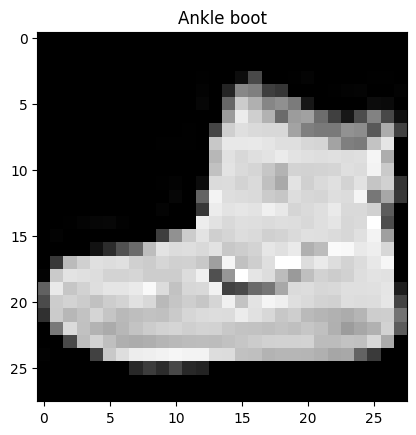

In [ ]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_name[label])
plt.show()

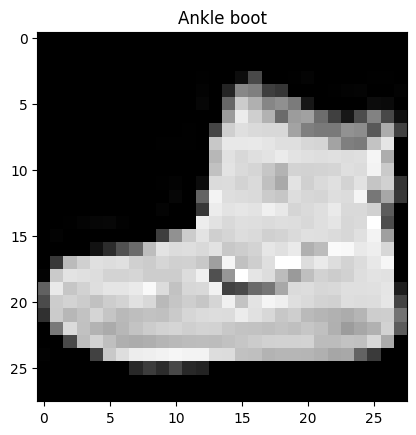

In [ ]:
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(class_name[label])
plt.show()

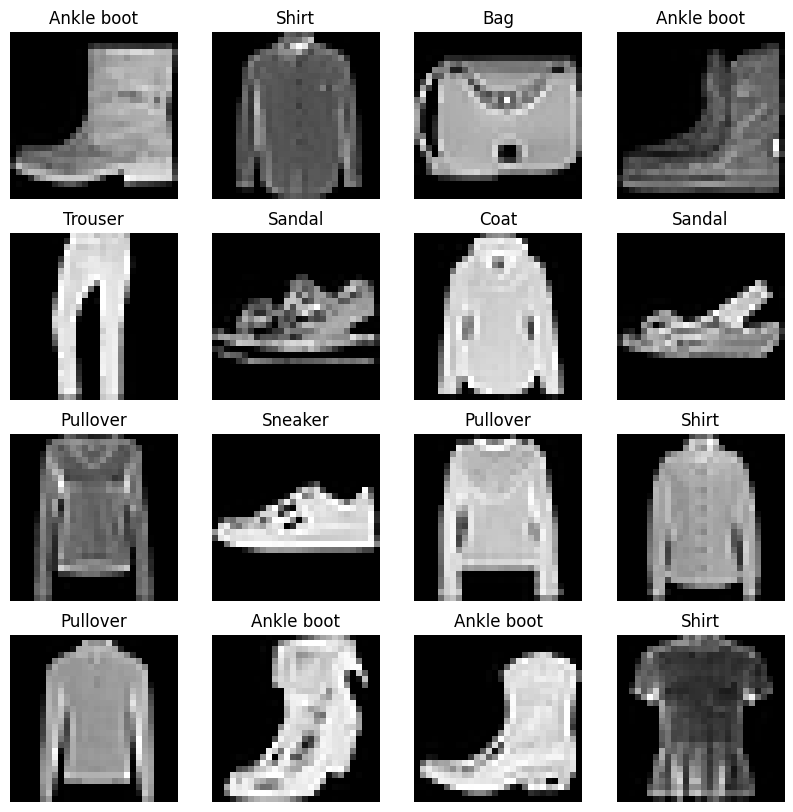

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize = (10,10))
rows, cols = 4,4
for i in range (1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size = [1]).item()
  image, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(image.squeeze(), cmap = "gray")
  plt.title(class_name[label])
  plt.axis(False)
plt.show()

In [ ]:
from torch.utils.data import dataloader

BATCH_SIZE = 32
train_dataloader = DataLoader(
    dataset = train_data,
    batch_size = BATCH_SIZE,
    shuffle = True,
)
test_dataloader = DataLoader(
    dataset = test_data,
    batch_size= BATCH_SIZE,
    shuffle = False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x79cb3e361570>,
 <torch.utils.data.dataloader.DataLoader at 0x79cb3e361ba0>)

In [ ]:
print(f"Dataloader: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloader: (<torch.utils.data.dataloader.DataLoader object at 0x79cb3e361570>, <torch.utils.data.dataloader.DataLoader object at 0x79cb3e361ba0>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

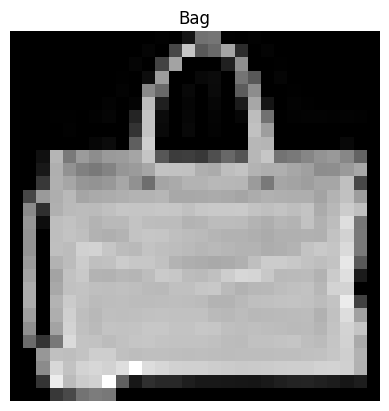

In [ ]:
from matplotlib.axes import Axes
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_name[label])
Axes.set_axis_off(self=plt.gca())
plt.show()

In [ ]:
flatten_model = nn.Flatten()

x = train_features_batch[0]
#output
output = flatten_model(x)
print (f"shape Before flatten : {x.shape}")
print(f"Shape after flatten {output.shape}")

shape Before flatten : torch.Size([1, 28, 28])
Shape after flatten torch.Size([1, 784])


In [ ]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self, input_shape, hidden_units, output_shape):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features= hidden_units),
        nn.Linear(in_features= hidden_units, out_features= output_shape )
    )
  def forward (self, x):
    return self.layer_stack(x)


In [ ]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape= 784, hidden_units= 10, output_shape= len(class_name)).to("cpu")
model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [ ]:
import requests
import os

if os.path.exists("helper_functions.py"):
  print("Skipping download, helper_functions.py exists!")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_0.parameters(), lr= 0.1)

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
  total_time = end - start
  print(f"Train time on {device}: {total_time: .3f} seconds")
  return total_time

In [ ]:
X = image ,
y= label

In [ ]:
from functools import total_ordering
from tqdm.auto import tqdm
torch.manual_seed(42)
train_time_start_cpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_loss = 0
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    y_pred = model_0(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % 400 == 0 :
      print(f"looked at {batch*len(X)}/{len(train_dataloader.dataset)} samples.")
  train_loss /= len(train_dataloader)
#testing
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      test_pred = model_0(X_test)
      test_loss += loss_fn(test_pred, y_test)
      test_acc += accuracy_fn(y_true= y_test, y_pred= test_pred.argmax(dim=1))
    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}")
train_time_end_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_cpu, end = train_time_end_cpu, device=str(next(model_0.parameters()).device ))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.59039 | Test loss: 0.50954, Test acc: 82.04
Epoch: 1
-------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.47633 | Test loss: 0.47989, Test acc: 83.20
Epoch: 2
-------
looked at 0/60000 samples.
looked at 12800/60000 samples.
looked at 25600/60000 samples.
looked at 38400/60000 samples.
looked at 51200/60000 samples.

Train loss: 0.45503 | Test loss: 0.47664, Test acc: 83.43
Train time on cpu:  34.562 seconds


In [ ]:
#make preditions
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      y_pred = model(X)
      # print(y_pred.argmax(dim=1))
      # print(y)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true= y, y_pred = y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
              "model_loss": loss.item(),
              "model_acc": acc}
model_0_results = eval_model(model= model_0, data_loader= test_dataloader, loss_fn= loss_fn, accuracy_fn= accuracy_fn)
model_0_results



  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [ ]:
#nonlineaar model
class FashionMNISTModelV1(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= input_shape, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= output_shape),
        nn.ReLU()
    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cpu


In [ ]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape= 784, hidden_units= 10, output_shape=len(class_name)).to(device)

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_1.parameters(), lr= 0.1)

In [ ]:
def train_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimiser: torch.optim.Optimizer,
               accuracy_fn, device: torch.device = device):

  train_loss, train_acc = 0, 0
  #model on train
  model.train()
  for batch, (X, y) in enumerate(data_loader):
    X, y = X.to(device), y.to(device)
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    train_loss += loss

    train_acc += accuracy_fn(y_true= y, y_pred = y_pred.argmax(dim=1))
    optimizer.zero_grad()

    loss.backward()
    optimizer.step()

  train_loss /= len(data_loader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")


In [ ]:
def test_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module,
              accuracy_fn, device: torch.device = device):
  test_loss, test_acc = 0 , 0

  model.eval()
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)
      test_pred = model(X)
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true = y, y_pred = test_pred.argmax(dim=1))

    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%")


In [ ]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n------------")
  train_step(model = model_1, data_loader= train_dataloader, loss_fn= loss_fn, optimiser= optimizer,
             accuracy_fn = accuracy_fn, device = device)

  test_step(model=model_1, data_loader= test_dataloader, loss_fn= loss_fn,
            accuracy_fn= accuracy_fn, device= device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start= train_time_start_on_gpu, end= train_time_end_on_gpu, device= device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Train loss: 1.09199 | Train acc: 61.34%
Test loss: 0.95636 | Test acc: 65.00%
Epoch: 1
------------
Train loss: 0.78101 | Train acc: 71.93%
Test loss: 0.72227 | Test acc: 73.91%
Epoch: 2
------------
Train loss: 0.67027 | Train acc: 75.94%
Test loss: 0.68500 | Test acc: 75.02%
Train time on cpu:  35.796 seconds


In [ ]:
#make preditions
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module,
               accuracy_fn):
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):
      X, y = X.to(device), y.to(device)
      y_pred = model(X)
      # print(y_pred.argmax(dim=1))
      # print(y)
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true= y, y_pred = y_pred.argmax(dim=1))

    loss /= len(data_loader)
    acc /= len(data_loader)

    return {"model_name": model.__class__.__name__,
              "model_loss": loss.item(),
              "model_acc": acc}




In [ ]:
#result dictionary
model_1_results = eval_model(model = model_1, data_loader = test_dataloader, loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850009560585022,
 'model_acc': 75.01996805111821}

In [ ]:
#Convolutional neural network
class FashionMINSTModelV2(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels= input_shape, out_channels= hidden_units,
                  kernel_size= 3, stride= 1, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units,
                  kernel_size= 3, stride= 1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units,
                  kernel_size= 3, stride= 1, padding= 1),
        nn.ReLU(),
        nn.Conv2d(in_channels= hidden_units, out_channels= hidden_units,
                  kernel_size= 3, stride= 1, padding= 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features= hidden_units* 7 * 7, out_features= output_shape)
    )

  def forward(self, x):
    x = self.conv_block_1(x)
    #print(f"Output shape of Conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    #print(f" Output shape pf conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f" Output shape of classifier: {x.shape}")
    return x

In [ ]:
torch.manual_seed(42)
model_2 = FashionMINSTModelV2(input_shape= 1, hidden_units= 10, output_shape= len(class_name)).to(device)
model_2

FashionMINSTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

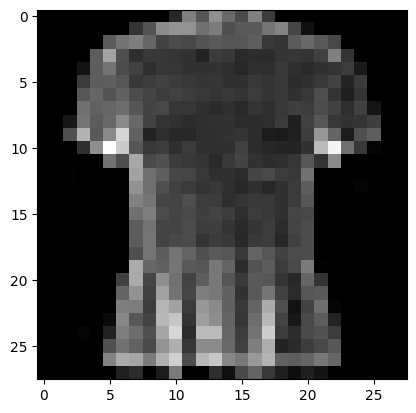

In [ ]:
  plt.imshow(image.squeeze(), cmap= "gray")


In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
 from helper_functions import accuracy_fn

 loss_fn = nn.CrossEntropyLoss()
 optimizer = torch.optim.SGD(params = model_2.parameters(),
                             lr= 0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

from timeit import default_timer as timer
train_time_start_model_2 = timer()

epochs = 3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n--------")
  train_step(model= model_2, data_loader= train_dataloader, loss_fn= loss_fn,
             optimiser= optimizer, accuracy_fn= accuracy_fn, device= device)

  test_step(model= model_2, data_loader= test_dataloader, loss_fn = loss_fn ,
            accuracy_fn= accuracy_fn, device= device)

  train_time_end_model_2 = timer()
  total_train_time_model_2 = print_train_time(start= train_time_start_model_2, end= train_time_end_model_2,
                                              device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
--------
Train loss: 0.59518 | Train acc: 78.38%
Test loss: 0.39500 | Test acc: 85.99%
Train time on cpu:  53.441 seconds
Epoch: 1
--------
Train loss: 0.36536 | Train acc: 86.90%
Test loss: 0.35244 | Test acc: 86.91%
Train time on cpu:  106.268 seconds
Epoch: 2
--------
Train loss: 0.32588 | Train acc: 88.13%
Test loss: 0.32719 | Test acc: 88.07%
Train time on cpu:  158.465 seconds


In [ ]:
#model2 results
model_2_results= eval_model(model= model_2, data_loader= test_dataloader,
                            loss_fn= loss_fn, accuracy_fn= accuracy_fn)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMINSTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

In [ ]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results,
                                               model_1_results,
                                               model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMINSTModelV2,0.327190,88.069089


In [ ]:
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,34.562111
1,FashionMNISTModelV1,0.685001,75.019968,35.796118
2,FashionMINSTModelV2,0.327190,88.069089,158.465211


<Axes: ylabel='model_name'>

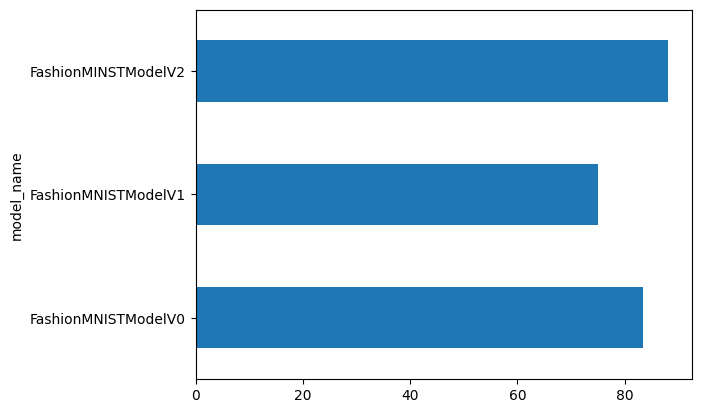

In [ ]:
compare_results.set_index("model_name")["model_acc"].plot(kind= "barh")

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list, device: torch.device = device):
  pred_probs= []
  model. to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      pred_logit = model(sample)

      current_pred_probs = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(current_pred_probs.cpu())
  return torch.stack(pred_probs)

In [ ]:

import random
random.seed(42)
test_samples =[]
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

In [ ]:
#make predictions
pred_probs = make_predictions(model= model_2, data= test_samples)
pred_probs[:2]

tensor([[1.4021e-06, 1.7343e-07, 4.4511e-07, 1.2103e-05, 5.4026e-07, 9.9938e-01,
         3.7154e-06, 2.1650e-04, 1.4199e-04, 2.4416e-04],
        [1.0080e-01, 5.6287e-01, 7.4506e-04, 1.1212e-01, 6.3881e-02, 3.0674e-04,
         1.5560e-01, 1.6463e-03, 1.0169e-03, 1.0133e-03]])

In [ ]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 7, 4, 3, 0, 4, 7, 1])

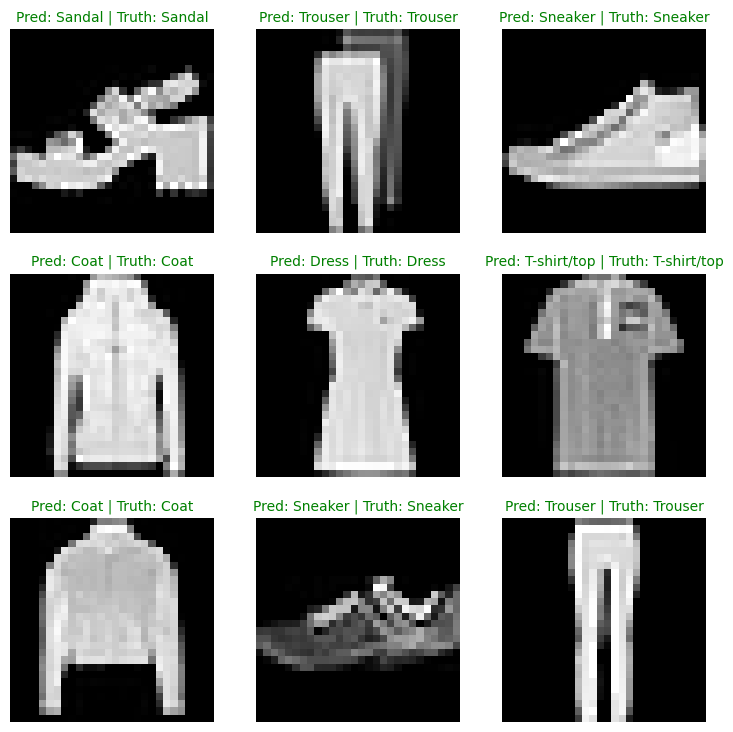

In [ ]:
plt.figure(figsize= (9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  plt.subplot(nrows, ncols, i+1)
  plt.imshow(sample.squeeze(), cmap= "gray")

  pred_label = class_name[pred_classes[i]]

  truth_label = class_name[test_labels[i]]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize= 10, color= "green")
  else:
    plt.title(title_text, fontsize= 10, color= "red")

  plt.axis(False)


In [ ]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

y_preds =[]
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc= "Making predictions.."):
    X, y = X.to(device), y.to(device)

    y_logit = model_2(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim= 0).argmax(dim= 1)

    y_preds.append(y_pred.cpu())


print(y_pred)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10]

Making predictions..:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([3, 2, 7, 5, 6, 4, 5, 6, 8, 9, 1, 9, 1, 8, 1, 8])


tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [ ]:
try:
  import torchmetrics, mlxtend
  print(f"mlxtend.version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(" . ")[1]) >= 19
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend.version: {mlxtend.__version__}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 926.4/926.4 kB 5.8 MB/s eta 0:00:00
mlxtend.version: 0.23.3


In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.3


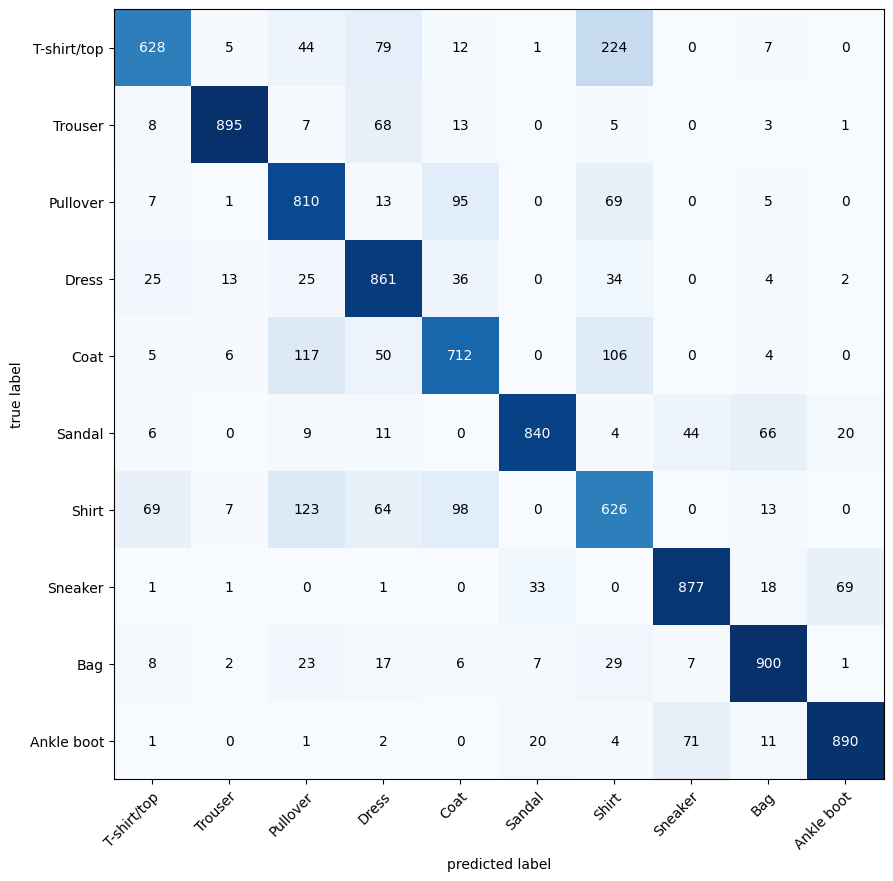

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_name), task = 'multiclass')
confmat_tensor = confmat(preds= y_pred_tensor,
                         target = test_data.targets)

fig , ax = plot_confusion_matrix(
    conf_mat= confmat_tensor.numpy(),
    class_names= class_name,
    figsize= (10, 10)
)

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents= True, exist_ok= True)

MODEL_NAME = "03_Pytorch_ComputerVision.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH
print(f"Saving Model to : {MODEL_SAVE_PATH}")
torch.save(obj= model_2.state_dict(), f= MODEL_SAVE_PATH)

Saving Model to : models/03_Pytorch_ComputerVision.pth
